In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import datetime, timedelta
from tqdm import notebook

# Absolute & Relative Spread Change Volatility of Investment grade universe
## (Exhibit 3) 
### trailing 36 month ('10.1.4. ~ '20.8.20.)

* moving standard deviation of 36 months


In [94]:
daily = pd.read_csv('invest_spread.csv', index_col='date')

In [95]:
daily.index = pd.to_datetime(daily.index)

In [96]:
daily

,weighted
date,
2010-01-01,72.854330
2010-01-02,72.930324
2010-01-03,73.001175
2010-01-04,72.706355
2010-01-05,72.637950
...,...
2020-08-16,47.781686
2020-08-17,47.838708
2020-08-18,47.605599


In [98]:
month = daily.resample('MS').first()

In [99]:
month

,weighted
date,
2010-01-01,72.854330
2010-02-01,69.675915
2010-03-01,65.973320
2010-04-01,57.965676
2010-05-01,57.558795
...,...
2020-04-01,50.028390
2020-05-01,55.861422
2020-06-01,52.706537


In [100]:
absolute = []
for i in range(len(month.index)-1):
    absolute.append(month.iloc[i+1]-month.iloc[i])

absolute = pd.DataFrame(absolute)

In [102]:
absolute.loc['last'] = 1

In [103]:
absolute = absolute.shift(1)

In [104]:
absolute.index = month.index

In [105]:
absolute

,weighted
date,
2010-01-01,NaN
2010-02-01,-3.178415
2010-03-01,-3.702595
2010-04-01,-8.007644
2010-05-01,-0.406880
...,...
2020-04-01,16.262321
2020-05-01,5.833033
2020-06-01,-3.154885


In [121]:
abv = absolute.rolling(36).std()

Text(0, 0.5, 'absolute bol(bp)')

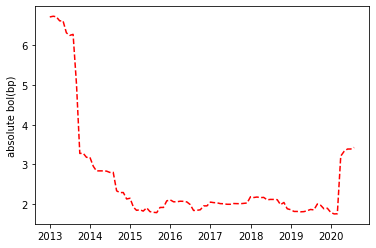

In [118]:
plt.plot(absolute.index, absolute.rolling(36).std(), 'r--')
plt.ylabel('absolute bol(bp)')

In [107]:
relative = month.pct_change()*100

In [108]:
relative

,weighted
date,
2010-01-01,NaN
2010-02-01,-4.362698
2010-03-01,-5.314025
2010-04-01,-12.137701
2010-05-01,-0.701933
...,...
2020-04-01,48.161722
2020-05-01,11.659445
2020-06-01,-5.647699


In [120]:
rev = relative.rolling(36).std()

Text(0, 0.5, 'relative vol(%)')

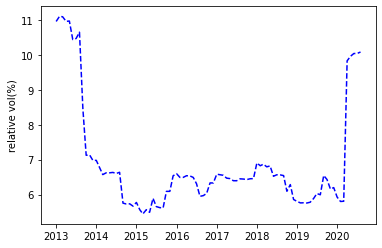

In [119]:
plt.plot(relative.index, relative.rolling(36).std(), 'b--')
plt.ylabel('relative vol(%)')

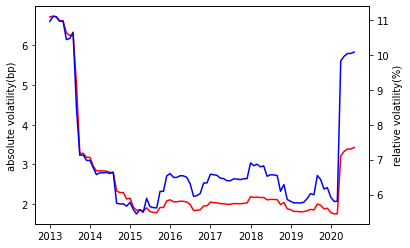

In [128]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('absolute volatility(bp)')
ax1.plot(absolute.index, abv, color = 'red')

ax2 = ax1.twinx()
ax2.set_ylabel('relative volatility(%)')
ax2.plot(relative.index, rev, color = 'blue')
plt.show()

In [14]:
abc.rolling(36).std()

,weighted
date,
2010-01-01,NaN
2010-02-01,NaN
2010-03-01,NaN
2010-04-01,NaN
2010-05-01,NaN
...,...
2020-04-01,4.369759
2020-05-01,6.047451
2020-06-01,7.003847


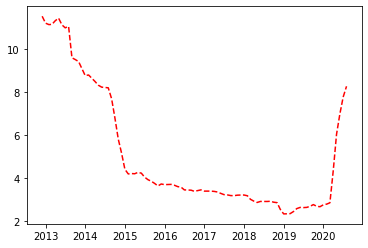

In [15]:
plt.plot(abc.index, abc.rolling(36).std(), 'r--')

# trailing 36 month spread change volatility

 = 36개월 moving standard deviation



<function matplotlib.pyplot.show(close=None, block=None)>

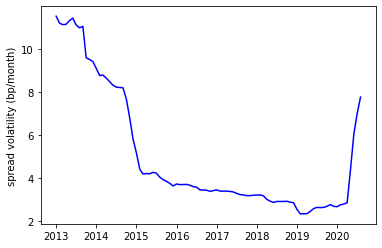

In [17]:
a = plt.plot(abcd.index, abcd, 'b')
plt.ylabel('spread volatility (bp/month)')
plt.show